In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [5]:
# Load the dataset
file_path = 'Add PATH/sales_data_sample.csv'  # Update with your file path
sales_data = pd.read_csv(file_path, encoding='ISO-8859-1')

In [7]:
# Step 3: Select relevant numerical columns for clustering
# Here we choose 'QUANTITYORDERED', 'PRICEEACH', and 'SALES' as features
sales_data_clustering = sales_data[['QUANTITYORDERED', 'PRICEEACH', 'SALES']]

In [8]:
# Step 4: Check for missing values
if sales_data_clustering.isnull().sum().any():
    print("There are missing values in the data.")
else:
    print("No missing values found in selected columns.")

No missing values found in selected columns.


In [9]:
# Step 5: Standardize the data
scaler = StandardScaler()
sales_data_scaled = scaler.fit_transform(sales_data_clustering)

In [10]:
# Step 6: Use the Elbow Method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sales_data_scaled)
    inertia.append(kmeans.inertia_)

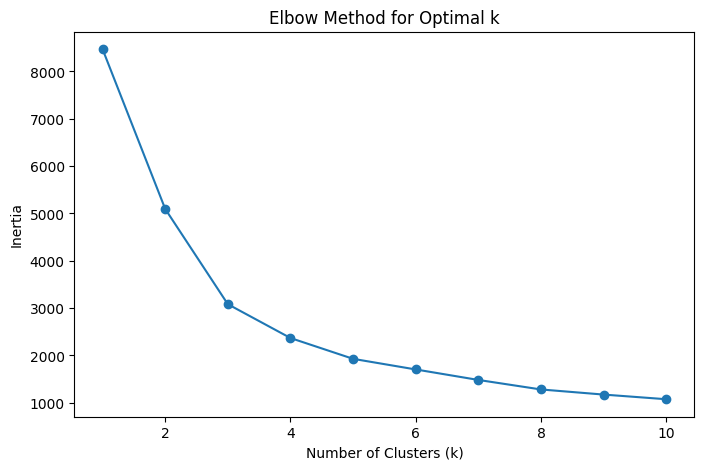

In [11]:
# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [12]:
# Step 7: Choose the optimal number of clusters and fit K-Means
# Based on the elbow curve, update 'optimal_k' as needed
optimal_k = 3  # Example, you may adjust this based on the elbow point
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
sales_data['Cluster'] = kmeans.fit_predict(sales_data_scaled)

In [13]:
# Step 8: Analyze the clusters
print(sales_data[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'Cluster']].groupby('Cluster').mean())

         QUANTITYORDERED  PRICEEACH        SALES
Cluster                                         
0              35.125993  57.130216  2009.829955
1              43.847850  96.637795  5584.007299
2              27.392271  94.865575  3089.153662


Explanation of Code Steps
Loading and Selecting Columns: This code loads the dataset and extracts QUANTITYORDERED, PRICEEACH, and SALES for clustering analysis.
Scaling: It standardizes the features, which is important for K-Means clustering as it is sensitive to the scale of data.
Elbow Method: The loop calculates the inertia for each k value from 1 to 10. The elbow plot shows where inertia begins to decrease more slowly, helping you choose the optimal number of clusters.
K-Means Clustering: After determining the optimal k, you fit the model and assign clusters to the original data.
Cluster Analysis: Finally, it displays the mean values of each feature within each cluster for insight into the groupings.